In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


La densidad para el medio interestelar está dada por
$$\begin{equation}
\rho_{g}(R,z) = \frac{\Sigma_{g}}{2z_{g}} exp(-\frac{R}{R_{g}} - \frac{R_{m}}{R} -\frac{|z|}{z_{g}})
\end{equation}$$

donde $R_{m} = 4kpc$,$z_{g} = 80pc$. Los parámetros $\Sigma_{g}$ y $R_{g}$ están relacionados con $\Sigma_{d}$ y $R_{d}$ asumiendo $R_{g} = 2R_{d}$

$$\begin{equation}
\frac{2\rho_{g}z_{g}}{\Sigma_{g}} = exp (-\frac{R}{R_{g}} -\frac{R_{m}}{R} -\frac{|z|}{z_{g}})
\end{equation}$$

In [2]:
def densidad_g(z,R,R_g=2.*2000.,R_m=4000.,z_g=80.):
    return np.exp(-R/R_g -R_m/R - abs(z)/z_g)

In [3]:
R = np.linspace(0.0,15.,100)
z = np.linspace(0.0,15.,100)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


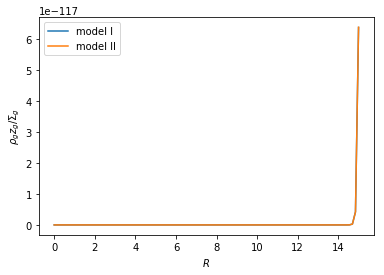

In [4]:
plt.plot(R, densidad_g(R,z)/2.,label='model I')
plt.plot(R, densidad_g(R,z,R_g=2*3.2e03)/2.,label='model II')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{g}z_{g}/\Sigma_{g}$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()

Para el potencial tomaremos la expresión (2.154)
$$\begin{equation}
\Phi(R,z) = -2\sqrt{2}G \int_{0}^{\infty} da \frac{((a+R)/\sqrt{+})-((a-R)/\sqrt{-})}{\sqrt{R^{2} - z^2 -a^2 + \sqrt{+}\sqrt{-}}} \int_{a}^{\infty} dR' \frac{R'\Sigma(R')}{\sqrt{R'^{2} - a^{2}}}
\end{equation}$$

y para la velocidad circular la ecuación (2.157)
$$\begin{equation}
v_{c}^{2} = R \frac{\partial \Phi}{\partial R} = -4G\int_0^{r} da \frac{a}{\sqrt{R^{2} - a^{2}}} \frac{d}{da} \int_{a}^{\infty} dR' \frac{R' \Sigma(R')}{\sqrt{R'^{2} - a^{2}}}
\end{equation}$$

donde tomaremos a $\Sigma(R')$ como
$$\begin{equation}
\Sigma(R) = \int_{-\infty}^{\infty} dz \rho_{g}(R,z) = 2\int_{0}^{\infty} dz \rho_{g}(R,z)
\end{equation}$$

al integrar obtenemos 
$$\begin{equation}
\Sigma (R) = \Sigma_{g} e^{-(R/R_{g} + R_{m}/R)}
\end{equation}$$

Por lo que al final la velocidad circular queda de la siguiente forma
$$\begin{equation}
\frac{2\pi v_{c}^{2}}{4G\Sigma_{g}R_{d}} = \int_{0}^{1}dx \frac{x}{\sqrt{1-x^{2}}}\int_{0}^{\infty} d\beta \frac{e^{-(xy\cosh\beta/2 + R_{m}/2R_{d}xy\cosh\beta)}}{\cosh\beta} (2xy\cosh\beta - x^{2}y^{2}\cosh^{2}\beta + \frac{2R_{m}}{R_{d}})
\end{equation}$$

In [6]:
def integral_ISM(x,beta,y,R_m=4000.,R_d=2000.):
    exp = np.exp(-x*y*np.cosh(beta)/2. + R_m/(2.*R_d*x*y*np.cosh(beta)))
    n = x*(2.*x*y*np.cosh(beta) -x**2. *y**2.*np.cosh(beta)**2 + 2.*R_m/R_d)
    d = np.sqrt(1.-x**2.)*np.cosh(beta)
    return (exp*n)/d

In [7]:
from scipy import integrate

In [ ]:
def Vc_ISM(l):
    Integral_ISM = []
    for i in range (0,len(l)):
        result = integrate.quad(integral_ISM,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.sqrt(Integral_b)


In [9]:
y = np.linspace(0.0,15.,100)

In [16]:
p = []
for i in range (0,len(y)):
    integrando = lambda x,beta: integral_ISM(x,beta,y[i])
    result = integrate.dblquad(integrando,0,1,lambda beta: 0, lambda beta: np.infty)[0]
    p.append(result)
print p

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [17]:
def other_integral(x,u,y,R_m=4000.,R_d=2000.):
    exp = np.exp(-x*y*u/2. -R_m/(2.*x*y*u*R_d))
    n = x*(2.*x*y*u - x**2.*y**2.*u**2. + 2.*R_m/R_d)
    d = np.sqrt(1.-x**2.)*np.sqrt(U**2. -1.)*u
    return (exp*n)/d
    

In [14]:
p = []
for i in range (0,len(y)):
    integrando = lambda x,beta: integral_ISM(x,beta,R[i])
    result = integrate.dblquad(integrando,0,1,lambda x: 0, lambda x: np.infty)[0]
    p.append(result)
print p

TypeError: a float is required

In [20]:
def integral2(theta,beta,y,R_m=4000.,R_d=2000.):
    exp = np.exp(-y*np.cosh(beta)*np.sin(theta)/2. - R_m/(2.*R_d*y*np.sin(theta)*np.cosh(beta)))
    n = 2.*y*np.sin(theta)**2. - y**2.*np.cosh(beta)*np.sin(theta)**3. + (2.*R_m*np.sin(theta))/(R_d*np.cosh(theta))
    return -n*exp

In [21]:
t = []
for i in range (0,len(y)):
    integrando = lambda beta,theta: integral2(theta,beta,y[i])
    result = integrate.dblquad(integrando,0,np.inf,lambda theta: 0, lambda theta: np.pi/2.)[0]
    t.append(result)
print t

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the 

[inf, 2.2437764402620644e+18, -59953415.12898935, 2.5640720124425543e+196, 4.319400364910875e+145, 1.403340531688094e+115, 6.1692405010226454e+94, 6.10332780725489e+80, 9.554936828680252e+69, -2.201104552799467e+40, 7.238879675773864e+54, 2.3116917368048002e+49, 6.102735602959859e+44, -2.9388006617259292e+26, -inf, -inf, -4.4675756454134094e+20, -1.486693249937506e+19, 57663026.16208985, 12271950.508817239, 2774665.150350329, 5.050446740843164e+155, -215677.18623666873, -460020.2801259902, -586281.2814804065, -225361.51787325184, -279925.7382698665, -338350.73927926476, -4100970.1064975397, -485758.26506614045, -6443126982.411512, inf, 3.8586605308513514e+99, 2.194308806538198e+96, 1.93743487200594e+93, 2.5576542901533e+90, -3582784344.9495354, 1.3075344085136704e+85, -18892304.200885277, inf, inf, 1.2131225746031768e+76, 1.244183054025014e+74, inf, inf, -56686861.462943844, -65877987.47637622, -76811507.61120918, -89708135.59256506, -76827515.17429002, -91087587.57331777, -107595354.9

In [26]:
G = 4.302e-3
r_b_I = 2.0e03
r_b_II = 3.2e03
Sigma_d_I = 1905.*0.25
Sigma_d_II = 536.*0.25
G = 4.302e-3
z_0 = 0.3e03
r_b2_I = 4.0e06
r_b2_II = 10.24e06
Sigma_d_I_d = 1905.*0.75
Sigma_d_II_d = 536.*0.75
C = 4.*G/z_0
print C

5.736e-05


In [25]:
def Vc_ad_d_I(l):
    Integral_d = []
    for i in range (0,len(l)):
        integrando = lambda z,x: I_d_I(x,z,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
        Integral_d.append(result)
    return np.sqrt(Integral_d)
def Vc_ad_d_II(l):
    Integral_d = []
    for i in range (0,len(l)):
        integrando = lambda z,x: I_d_II(x,z,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
        Integral_d.append(result)
    return np.sqrt(Integral_d)

In [ ]:
plt.plot(R,np.sqrt(C*r_b2_I*Sigma_d_I)*Vc_ad_d_I(R),label='model I')
xlim(0.,12.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


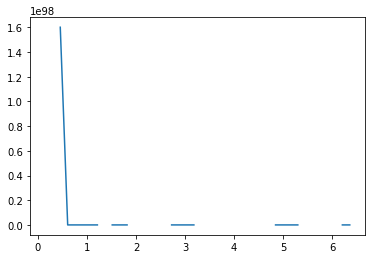

In [28]:
plt.plot(R,np.sqrt(t))